In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlite3

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
conn = sqlite3.connect("hawaii.sqlite")

In [6]:
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT sql FROM sqlite_master WHERE name='measurement'")
mesur = cur.fetchall()
 
for mesurDef in mesur:
    print(mesurDef)
    


('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [7]:
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT * FROM measurement")
mesData = cur.fetchall()
 
#for mesDef in mesData:
 #   print(mesDef)

In [8]:
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT sql FROM sqlite_master WHERE name='station'")
stat = cur.fetchall()

for statDef in stat:
    print(statDef)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [9]:
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT * FROM station")
stat = cur.fetchall()

for statData in stat:
    print(statData)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [10]:
# Save references to each table
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT measurement.date, measurement.prcp FROM measurement Where (measurement.date >= '2016-08-24') and (measurement.date <= '2017-08-23') order by measurement.date ")
data = {'date': [], 'precip': []}
mesur = cur.fetchall()
df = []
for mesurData in mesur:
    data['date'].append(mesurData[0])
    data['precip'].append(mesurData[1])
    
df = pd.DataFrame(data['precip'], columns = ['prcp'], index = data['date'])
df = df.replace(np.nan, 0)
print(df.head(20))

            prcp
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  0.00
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01


# Exploratory Climate Analysis

In [11]:
#create bar plot as usual
plt.figure(figsize=(10,5))
y = df['prcp'].tolist()
x = np.arange(0,len(df['prcp']),1)

<Figure size 720x360 with 0 Axes>

In [12]:
# Define X-tick labels (months) and their positioning
month_total = len(y)
month_step_xticks = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, month_total, month_step_xticks)]

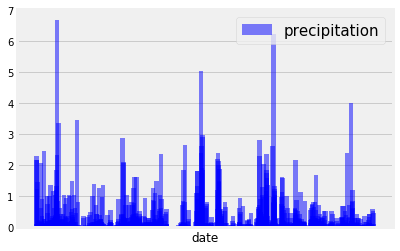

In [13]:
plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge",label='precipitation')
plt.xticks([])
plt.xlabel("date")
plt.legend(loc=1, prop={'size': 15})

In [14]:
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT count(distinct(station)) FROM measurement")
statCount = cur.fetchall()
 
for statCt in statCount:
    print("Number of station",statCt[0])

Number of station 9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT measurement.station, count(measurement.tobs)FROM measurement group by measurement.station order by count(measurement.tobs) desc;")
statMost = cur.fetchall()

for statCt in statCount:
    print(statMost)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT min(tobs), max(tobs), avg(tobs) FROM measurement WHERE station = 'USC00519281';")
statQuery = cur.fetchall()
print(statQuery)


[(54.0, 85.0, 71.66378066378067)]


In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cur = conn.cursor()
#obtain details of the schema/table format from table named garbage_collection
cur.execute("SELECT date, tobs FROM measurement WHERE ((measurement.date <= '2017-12-31') and (measurement.date >= '2017-01-01')) and measurement.station = 'USC00519281' GROUP BY measurement.date")
#print(statHist)
Histdata = cur.fetchall()
dataHist = {'date': [], 'tobs': []}
Histdf = []
for HistData in Histdata:
    dataHist['date'].append(HistData[0])
    dataHist['tobs'].append(HistData[1])
Histdf = pd.DataFrame(dataHist['tobs'], columns = ['tobs'], index = dataHist['date'])
Histdf = Histdf.replace(np.nan, 0)
Histdf.head(10)

,tobs
2017-01-01,72.0
2017-01-02,70.0
2017-01-03,64.0
2017-01-04,63.0
2017-01-05,63.0
2017-01-06,62.0
2017-01-07,70.0
2017-01-08,70.0
2017-01-09,62.0
2017-01-10,62.0


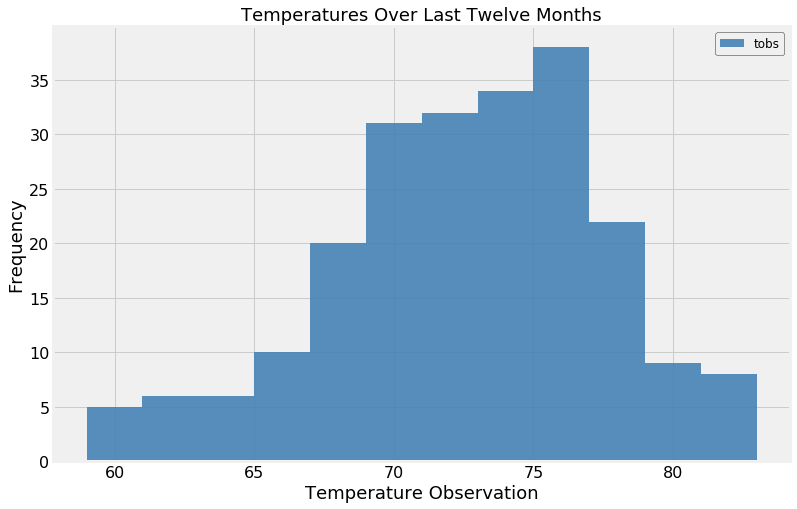

In [23]:
#Plot the results as a histogram 
x = Histdf['tobs']
num_bins = 12
# the histogram of the data
#n, bins, patches = 
plt.figure(figsize=[12.8, 8])
temp_plot = plt.hist(x, num_bins, facecolor='steelblue', label='tobs', alpha=0.9)

plt.xlabel('Temperature Observation', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Temperatures Over Last Twelve Months', fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='large')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [24]:
# Climate app
# /api/v1.0/precipitation
# Query for the dates and temperature observations from the last year
app = Flask(__name__)

@app.route('/api/v1.0/precipitation') 
def precipitation():
    print("Server received request for 'Precipitation' page...")
    return "Here are the dates and temperature observations from last year!"

    last_year_temp = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .order_by(HI_measurements.date)
                      .all())

    # Convert the query results to a Dictionary using date as the key and tobs as the value
    dates_and_temp = []
    for date in last_year_temp:
        date_dict ={}
        date_dict['date'] = HI_measurements.date
        date_dict['temperature'] = HI_measurements.tobs
        dates_and_temp.append(date_dict)
    
# Return the json representation of your dictionary
    return jsonify(dates_and_temp)

In [25]:
# /api/v1.0/stations
# Return a json list of stations from the dataset
@app.route('/api/v1.0/stations') 
def stations():
    print("Server received request for 'Stations' page...")
    return "Here is the list of stations from the dataset!"

    stations_query = (session
                      .query(HI_stations.stations)
                      .all())
    
    return jsonify(stations_query)

In [26]:
# /api/v1.0/tobs
# Return a json list of Temperature Observations (tobs) for the previous year
@app.route('/api/v1.0/tobs') 
def tobs():
    print("Server received request for 'Temperature Observations' page...")
    return "Here is the list of Temperature Observations (tobs) for the previous year!"
    
    tobs_last_year = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .order_by(HI_measurements.tobs)
                      .all())
    
    return jsonify(tobs_last_year)

In [27]:
# /api/v1.0/<start> and /api/v1.0/<start>/<end>
# Return a json list of the minimum temperature, the average temperature, and 
# the max temperature for a given start or start-end range.
@app.route('/api/v1.0/<start>)') 
def tobs_start():
    print("Server received request for 'Min Temp, Avg Temp, Max Temp of a given start' page...")
    return "Here is the list of Temperature information for the a given date!"
    
    start = HI_measurements.date <= '2010-01-01'
    end = HI_measurements.date >= '2017-08-23'

    # When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater 
    # than and equal to the start date
    tobs_start_only = (session
                       .query(HI_measurements.tobs)
                       .filter(HI_measurements.date.between(start, '2017-08-23'))
                       .all())
    
    tso_df = pd.DataFrame(tobs_start_only)
    
    tmin = tso_df.min()
    tmax = tso_df.max()
    tavg = tso_df.avg()
    
    return jsonify(tmin, tmax, tavg)

@app.route('/api/v1.0/<start>/<end>') 
def tobs_given_range():
    
    print("Server received request for 'Min Temp, Avg Temp, Max Temp of a given start or date range' page...")
    return "Here is the list of Temperature information for the a given date range!"
    
    # When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start 
    # and end date inclusive.
    tobs_given_range = (session
                        .query(HI_measurements.tobs)
                        .filter(HI_measurements.date.between(start, end))
                        .all())
    
    # Convert to Dataframe to calculate TMIN, TAVG, TMAX
    tgr_df = pd.DataFrame(tobs_given_range)
    
    t2min = tgr_df.min()
    t2max = tgr_df.max()
    t2avg = tgr_df.avg()
    
    return jsonify(t2min, t2max, t2avg)

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
#def calc_temps(start_date, end_date):
#TMIN, TAVE, and TMAX
cur2 = conn.cursor()
Statdf = []
#obtain details of the schema/table format from table named garbage_collection
#Statdf = pd.read_sql_query("SELECT date(measurement.date,'YYYY-MM-DD'), min(measurement.tobs), avg(measurement.tobs), max(measurement.tobs) FROM measurement WHERE date(measurement.date,'YYYY-MM-DD') >= '2012-02-28' and date(measurement.date,'YYYY-MM-DD') <= '2012-03-05' group by(measurement.date);",conn)
cur2.execute("SELECT measurement.date, min(measurement.tobs), avg(measurement.tobs), max(measurement.tobs) FROM measurement WHERE measurement.date >= '2017-05-01' and measurement.date <= '2017-05-15' group by(measurement.date);")
dataSt = {'date': [], 'TMIN': [], 'TAVG': [],'TMAX': []}
#Sta
Statdata2 = cur2.fetchall() 

for statDt2 in Statdata2:
    dataSt['date'].append(statDt2[0])
    dataSt['TMIN'].append(statDt2[1])
    dataSt['TAVG'].append(statDt2[2])
    dataSt['TMAX'].append(statDt2[3])
    #print(statDt2)
#print(dataSt['TMAX'].max())
    #dataSt['TMAX'].append(statData[3])
#print(statData[])
Statdf = pd.DataFrame(dataSt)
Statdf.head(10)
#Statdf.max()
#Statdf['TMAX'].min()

,date,TMIN,TAVG,TMAX
0,2017-05-01,65.0,72.000000,78.0
1,2017-05-02,73.0,76.500000,79.0
2,2017-05-03,70.0,75.600000,78.0
3,2017-05-04,74.0,76.333333,78.0
4,2017-05-05,70.0,76.333333,79.0
5,2017-05-06,74.0,77.500000,80.0
6,2017-05-07,70.0,75.400000,79.0
7,2017-05-08,66.0,72.833333,80.0
8,2017-05-09,67.0,73.400000,79.0
9,2017-05-10,72.0,75.166667,78.0


In [111]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and
# for your trip using the previous year's data for those same dates.


In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

totalavg = Statdf['TAVG'].mean()
totalavg

75.23111111111112

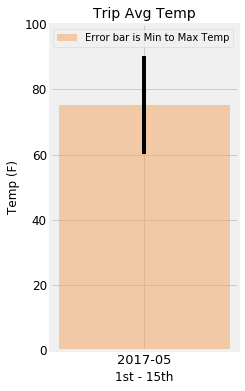

In [30]:
#Plot the total Avg Temp for My Trip
plt.figure(figsize=[3, 6])

totalavg_plt = plt.bar('2017-05', totalavg, yerr=15, color='sandybrown', alpha=.5, label='Error bar is Min to Max Temp')
#pmax = plt.bar(p3_date, p3_tmax)

plt.ylabel('Temp (F)', fontsize=12)
plt.xlabel('1st - 15th')
plt.title('Trip Avg Temp', fontsize=14)
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(np.arange(0, 120, 20), fontsize=12)

plt.show()

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [32]:
cur = conn.cursor()
start_date = '2017-07-01'
end_date ='2017-07-14'

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def precipitation(date1,date2):
      sql = "SELECT measurement.station, station.name, station.latitude, station.longitude, station.elevation, measurement.prcp FROM measurement, station WHERE measurement.station = station.station and measurement.date >= '%s' and measurement.date <= '%s' group by(measurement.station) order by(Measurement.prcp) desc " % (date1, date2)
      return sql

sqlquery = precipitation(start_date,end_date)
#print sqlquery. 

df=pd.read_sql(sqlquery,conn)
df



,station,name,latitude,longitude,elevation,prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.10
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.08
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.06
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.02
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,NaN
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,NaN


In [33]:
cur3 = conn.cursor()
df1 = []
temperatures = []
dates_range = pd.date_range('2017-07-01', '2017-07-14')

for date1 in dates_range.strftime('%Y-%m-%d'):
    #print(date1)
    cur3.execute("SELECT min(measurement.tobs), avg(measurement.tobs), max(measurement.tobs) FROM measurement WHERE date(measurement.date) = '%s';" % (date1))
    #print(sql)
    df1 = cur3.fetchall()
    temperatures.append(*df1)
df = pd.DataFrame(temperatures, columns=['Min', 'Avg', 'Max'])
df['Date'] = dates_range
df.set_index('Date',inplace=True)
df






,Min,Avg,Max
Date,,,
2017-07-01,74.0,77.250000,80.0
2017-07-02,77.0,79.200000,81.0
2017-07-03,76.0,79.571429,87.0
2017-07-04,77.0,78.000000,80.0
2017-07-05,75.0,78.571429,81.0
2017-07-06,74.0,77.166667,81.0
2017-07-07,74.0,77.142857,79.0
2017-07-08,71.0,77.166667,81.0
2017-07-09,76.0,79.333333,82.0


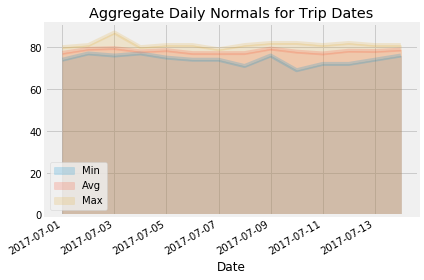

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Aggregate Daily Normals for Trip Dates")
plt.tight_layout()
plt.savefig("DailyNormals.png")
plt.show()

In [118]:
# Plot the daily normals as an area plot with `stacked=False`
